In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [51]:
df = pd.read_csv('./cleaned_data_csv/BayCounty2000sEcon.csv')
df = df.iloc[:17]

In [53]:
df = df[['Year', ' Per capita personal income 4/(Dollars)', ' Population (persons) 3/(Number of persons)', '  Unemployment insurance compensation(Thousands of dollars)']]
df.columns = ['year', 'average_personal_income', 'population', 'unemployment_insurance_compensation']
df

,year,average_personal_income,population,unemployment_insurance_compensation
0,2001,26697,150207,10839
1,2002,27746,152741,16265
2,2003,29289,155044,15684
3,2004,30834,158804,9929
4,2005,32605,162917,8226
5,2006,34451,165644,8207
6,2007,35671,165345,9858
7,2008,36673,166267,18528
8,2009,35372,167464,48161
9,2010,36789,169207,52933


In [54]:
income_pop = df

In [55]:
income_pop.to_csv('./income_pop.csv')
income_pop

,year,average_personal_income,population,unemployment_insurance_compensation
0,2001,26697,150207,10839
1,2002,27746,152741,16265
2,2003,29289,155044,15684
3,2004,30834,158804,9929
4,2005,32605,162917,8226
5,2006,34451,165644,8207
6,2007,35671,165345,9858
7,2008,36673,166267,18528
8,2009,35372,167464,48161
9,2010,36789,169207,52933


In [56]:
income_pop['gdp'] = income_pop['average_personal_income']*income_pop['population']

/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
income_pop['gdp_diff'] = income_pop['gdp'].diff(1)

/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
income_pop['gdp_percent_change'] = income_pop['gdp'].pct_change()

/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
income_pop['gdp_percent_change'].mean()

0.0428540222533747

In [60]:
income_pop['unemp_ins_comp_pct_change'] = income_pop['unemployment_insurance_compensation'].pct_change()

/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
income_pop['unemp_ins_comp_pct_change'] = income_pop['unemp_ins_comp_pct_change'].shift(-1)

/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
income_pop

,year,average_personal_income,population,unemployment_insurance_compensation,gdp,gdp_diff,gdp_percent_change,unemp_ins_comp_pct_change
0,2001,26697,150207,10839,4010076279,0.0,0.000000,0.500600
1,2002,27746,152741,16265,4237951786,227875507.0,0.056826,-0.035721
2,2003,29289,155044,15684,4541083716,303131930.0,0.071528,-0.366934
3,2004,30834,158804,9929,4896562536,355478820.0,0.078281,-0.171518
4,2005,32605,162917,8226,5311908785,415346249.0,0.084824,-0.002310
5,2006,34451,165644,8207,5706601444,394692659.0,0.074303,0.201170
6,2007,35671,165345,9858,5898021495,191420051.0,0.033544,0.879489
7,2008,36673,166267,18528,6097509691,199488196.0,0.033823,1.599363
8,2009,35372,167464,48161,5923536608,-173973083.0,-0.028532,0.099084
9,2010,36789,169207,52933,6224956323,301419715.0,0.050885,-0.203181


In [117]:
fig = plt.figure(figsize=(15,9))

ax = fig.sub_plot(income_pop['unemp_ins_comp_pct_change'])


AttributeError: 'Figure' object has no attribute 'sub_plot'

<Figure size 1080x648 with 0 Axes>

In [76]:
income_pop.fillna(0, inplace=True)

/Users/Joey/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [77]:
hurricanes = pd.read_csv('./cleaned_data_csv/cleaned_hurricane_data.csv')
hurricanes = hurricanes[hurricanes['Landfall Location'] == 'FL']
hurricanes

,Name,Year,Month,Landfall Location,Centroid Pressure,Max Wind Speed,Category
8,Kate,1985,Nov,FL,967,85,2
11,Floyd,1987,Oct,FL,993,65,1
17,Andrew,1992,Aug,FL,922,145,5
19,Erin,1995,Aug,FL,973,85,2
20,Opal,1995,Oct,FL,942,100,3
25,Earl,1998,Sep,FL,987,70,1
26,Georges,1998,Sep,FL,964,90,2
29,Irene,1999,Oct,FL,964,95,2
34,Charley,2004,Aug,FL,941,130,4
36,Frances,2004,Sep,FL,960,90,2


In [78]:
df = pd.merge(income_pop, hurricanes, how = 'left', left_on = 'year', right_on = 'Year')

In [79]:
df = df.dropna().reset_index(drop=True)

In [80]:
df = df.drop(columns = 'Year')

In [81]:
df.columns = ['year', 'average_personal_income', 'population', 'unemployment_insurance_compensation', 'gdp', 'gdp_diff', 'gdp_percent_change', 'unemp_ins_comp_pct_change','name', 'month', 
             'landfall_location', 'centroid_pressure', 'max_wind_speed', 'category']

In [82]:
df['centroid_pressure'] = df['centroid_pressure'] = df['centroid_pressure'].map(lambda cell: int(cell))

In [83]:
df['max_wind_speed'] = df['max_wind_speed'] = df['max_wind_speed'].map(lambda cell: int(cell))

In [84]:
df['category'] = df['category'] = df['category'].map(lambda cell: int(cell))

In [85]:
df

,year,average_personal_income,population,unemployment_insurance_compensation,gdp,gdp_diff,gdp_percent_change,unemp_ins_comp_pct_change,name,month,landfall_location,centroid_pressure,max_wind_speed,category
0,2004,30834,158804,9929,4896562536,355478820.0,0.078281,-0.171518,Charley,Aug,FL,941,130,4
1,2004,30834,158804,9929,4896562536,355478820.0,0.078281,-0.171518,Frances,Sep,FL,960,90,2
2,2004,30834,158804,9929,4896562536,355478820.0,0.078281,-0.171518,Jeanne,Sep,FL,950,105,3
3,2005,32605,162917,8226,5311908785,415346249.0,0.084824,-0.002310,Dennis,Jul,FL,946,105,3
4,2005,32605,162917,8226,5311908785,415346249.0,0.084824,-0.002310,Katrina,Aug,FL,920,110,3
5,2005,32605,162917,8226,5311908785,415346249.0,0.084824,-0.002310,Rita,Sep,FL,937,100,3
6,2005,32605,162917,8226,5311908785,415346249.0,0.084824,-0.002310,Wilma,Oct,FL,950,105,3
7,2016,41327,182992,5258,7562510384,219847600.0,0.029941,-0.050590,Hermine,Sep,FL,981,70,1
8,2016,41327,182992,5258,7562510384,219847600.0,0.029941,-0.050590,Matthew,Oct,FL,963,85,2
9,2017,42476,183563,4992,7797021988,234511604.0,0.031010,0.000000,Irma,Sep,FL,931,115,4


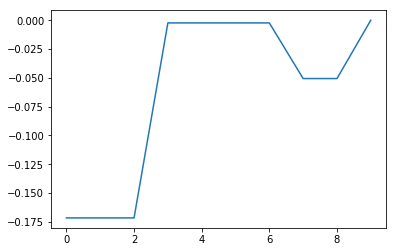

In [86]:
plt.plot(df['unemp_ins_comp_pct_change'])

In [105]:
X = df.loc[:, df.dtypes == np.int]
y = df['gdp_diff']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    test_size = .33)

In [107]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
preds = lr.predict(X_test)

In [109]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.31783298404022864, 0.1489191030194158)

In [110]:
df.shape

(30, 11)

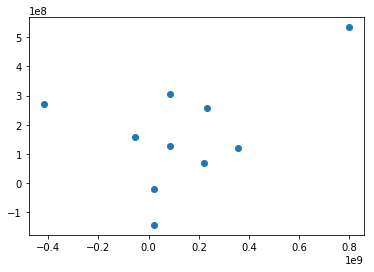

In [111]:
plt.scatter(y_test, preds)